# Progetto Laboratorio di Big Data, Data Mining e Data Analytics

## Obiettivi

### 1. **Analisi dello Storico delle Temperature**
Analisi delle tendenze delle temperature mensili, stagionali e tra periodi decennali, confrontando l'andamento di TAS, TSMAX e TSMIN nel tempo, e visualizzando la distribuzione delle temperature e i cambiamenti stagionali.

### 2. **Analisi dello Storico delle Piogge**
Esame della correlazione tra precipitazioni e temperature, confrontando i rispettivi andamenti nel tempo e visualizzando la relazione tramite una matrice di correlazione.

### 3. **Analisi delle Emissioni di CO₂**
Studio dell'andamento delle emissioni globali di CO₂ nel tempo, confrontandole con le temperature e analizzando la correlazione tra la temperatura media (TAS) e le emissioni di CO₂.

### 4. **Analisi delle Precipitazioni Intense e della Siccità**
Esame delle tendenze delle precipitazioni intense (giorni con piogge > 50 mm), del numero di giorni consecutivi senza pioggia e della relazione tra piogge intense e siccità prolungate, per identificare eventuali cambiamenti e correlazioni nel tempo.

### 5. **Analisi Predittiva con Regressione Lineare**
Utilizzo della regressione lineare per prevedere le emissioni di CO₂ e le temperature future, mostrando anche la trend line e le previsioni grafiche.

---

## Fonti dei Dati Utilizzati

1. **Rapporti su Clima e Piogge**  
   I dati sul clima e le precipitazioni sono stati scaricati dalla piattaforma World Bank Climate Knowledge Portal. Questi dati forniscono informazioni dettagliate sulle tendenze climatiche in italia, con particolare attenzione alle variazioni delle temperature e delle precipitazioni.

   [Climate Knowledge Portal - World Bank](https://climateknowledgeportal.worldbank.org/download-data)

2. **Dati sulle Emissioni di CO₂**  
   Le informazioni sulle emissioni di CO₂ provengono da Our World in Data, che offre un ampio database sulle emissioni di gas serra a livello globale. Questi dati sono fondamentali per analizzare l'impatto delle emissioni di CO₂ sul cambiamento climatico.

   [CO₂ Emissions - Our World in Data](https://ourworldindata.org/co2-emissions)


In [72]:
# Import delle librerie necessarie

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


## 1. **Analisi dello Storico delle Temperature**
- 1. Temperatura Max / Min Mensile
- 2. Suddivisione del Dataset in Stagioni
- 3. Differenza Percentuale tra Decenni
- 4. Grafico del Trend Stagionale
- 5. Distribuzione delle Temperature nel Tempo
- 6. Andamento TAS, TSMAX e TSMIN
- 7. Aumento delle deviazioni climatiche 

In [73]:
# Importazione del file csv
df_temperatura = pd.read_csv('Temperature1950-2023.csv')

In [ ]:
# Si mostrano le prime righe
df_temperatura.head()

In [ ]:
# Stampa del tipo di dato e verifica dei valori nulli
df_temperatura.info()

**Analisi del dataset:**

Il dataset contiene 888 righe e 5 colonne: Year, Month, TAS (temperatura superficiale media), TSMAX (temperatura superficiale massima), e TSMIN (temperatura superficiale minima). Non ci sono valori nulli, i dati coprono il periodo dal 1950 al 2023 e includono tutti i mesi per ogni anno. I dati si riferiscono specificamente al territorio italiano.

**1.1** Calcolare e stampare la temperatura media mensile più alta (TSMAX) e più bassa (TSMIN) mai registrata.

In [ ]:
print(f"La temperatura minima più bassa (TSMIN) è: {df_temperatura['TSMIN'].min()}°C")
print(f"La temperatura massima più alta (TSMAX) è: {df_temperatura['TSMAX'].max()}°C")

**1.2** Organizzare i dati in stagioni (Autunno, Inverno, Estate, Primavera).

In [ ]:
# Suddivisione degli anni in stagioni ai mesi
def assign_season(month):
    if month in [12, 1, 2]:
        return "Winter"
    elif month in [3, 4, 5]:
        return "Spring"
    elif month in [6, 7, 8]:
        return "Summer"
    elif month in [9, 10, 11]:
        return "Autumn"


df_temperatura["Season"] = df_temperatura["Month"].apply(assign_season)

# Crazione di un nuovo dataframe dove vengono aggregati i dati facendo la media stagionale per ogni anno
df_seasonal_means = df_temperatura.groupby(["Year", "Season"]).agg(
    TAS_mean=("TAS", "mean"),
    TMAX_mean=("TSMAX", "mean"),
    TMIN_mean=("TSMIN", "mean")
).reset_index()

# Stampa per verificare che ci siano 4 righe per ogni anno, una per ogni stagione
df_seasonal_means.head()

**1.3** Calcolare la differenza percentuale tra il primo e l'ultimo decennio del dataset e visualizzare il cambiamento nel tempo.

In [ ]:
# Filtro dei i dati per il decennio 1950-1959
df_1950_1959 = df_temperatura[(df_temperatura['Year'] >= 1950) & (df_temperatura['Year'] <= 1959)]

# Calcolo dell media, massima e minima per ogni stagione
df_1950_1959 = df_1950_1959.groupby('Season').agg(
    TAS_mean=('TAS', 'mean'),
    TMAX_mean=('TSMAX', 'mean'),
    TMIN_mean=('TSMIN', 'mean')
).reset_index()

# Stampa dei dati
print("Temperatura media, massima e minima per stagione nel periodo 1950-1959:")
df_1950_1959

In [ ]:
# Filtro dei dati per il decennio 2014-2023
df_2014_2023 = df_temperatura[(df_temperatura['Year'] >= 2014) & (df_temperatura['Year'] <= 2023)]

# Calcolo della media, massima e minima per ogni stagione
df_2014_2023 = df_2014_2023.groupby('Season').agg(
    TAS_mean=('TAS', 'mean'),
    TMAX_mean=('TSMAX', 'mean'),
    TMIN_mean=('TSMIN', 'mean')
).reset_index()

# Stampa dei dati
print("Temperatura media, massima e minima per stagione nel periodo 2014-2023:")
df_2014_2023

In [ ]:
# Nuovo Dataframe per contenere le variazioni percentuali
percentage_change = pd.DataFrame()

# Calcolo dela variazione percentuale per ogni colonna (TAS, TMAX, TMIN)
for column in ['TAS_mean', 'TMAX_mean', 'TMIN_mean']:
    percentage_change[column] = ((df_2014_2023[column] - df_1950_1959[column]) / df_1950_1959[column]) * 100

# Aggiunta la colonna 'Season'
percentage_change['Season'] = df_1950_1959['Season']

# Stampa dei dati
print("Variazione percentuale delle temperature per ogni stagione:")
percentage_change

In [81]:
# Unione dei dati dei decenni per ogni stagione
df_comparison_TAS = pd.merge(df_1950_1959[['Season', 'TAS_mean']], df_2014_2023[['Season', 'TAS_mean']], 
                             on='Season', suffixes=('_1950_1959', '_2014_2023'))

In [ ]:
# Impostazione per la larghezza delle barre e posizione
bar_width = 0.35
x = np.arange(len(df_comparison_TAS['Season']))

# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))

# Creazione grafico a barre
plt.bar(x - bar_width/2, df_comparison_TAS['TAS_mean_1950_1959'], bar_width, label='1950-1959 (TAS)', color='blue')
plt.bar(x + bar_width/2, df_comparison_TAS['TAS_mean_2014_2023'], bar_width, label='2014-2023 (TAS)', color='lightblue')

# Etichette e titoli
plt.xlabel('Stagione')
plt.ylabel('Temperatura Media (°C)')
plt.title('Confronto della Temperatura Media TAS per Stagione: 1950-1959 vs 2014-2023')
plt.xticks(x, df_comparison_TAS['Season'], rotation=45)
plt.legend(title="Periodo", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)

# Visualizzazione del grafico
plt.tight_layout()
plt.show()

**Analisi del grafico:**

Il grafico confronta la **temperatura media (TAS)** per stagione nei decenni 1950-1959 e 2014-2023. La variazione percentuale evidenzia:

- **Autunno**: Aumento del **12.31%** nella temperatura media.
- **Primavera**: Aumento del **12.47%**.
- **Estate**: Aumento più contenuto del **8.34%**.
- **Inverno**: Il dato più significativo con un aumento della temperatura media (TAS) del **41.20%**, accompagnato da un incremento straordinario delle temperature minime (+144.71%).

**1.4** Creare grafici per visualizzare l'andamento delle temperature per ciascuna stagione.

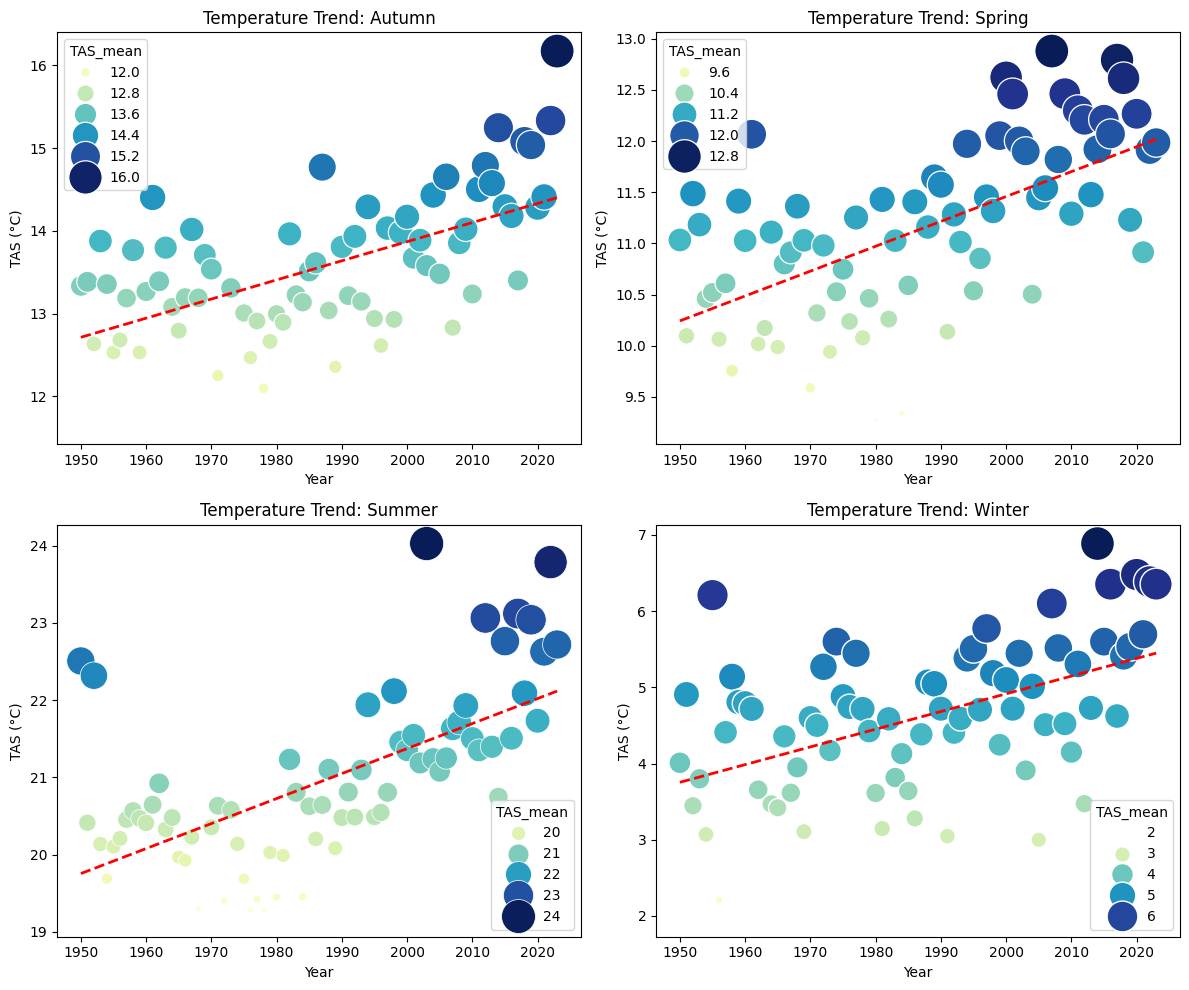

In [83]:
# Crazione di un array di stagioni
seasons = df_seasonal_means['Season'].unique()

fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

# Creazione dei grafici 
for i, season in enumerate(seasons):
    ax = axes[i]
    season_data = df_seasonal_means[df_seasonal_means['Season'] == season]
    
    # Scatter plot
    sns.scatterplot(x='Year', y='TAS_mean', size="TAS_mean", hue='TAS_mean', palette='YlGnBu', data=season_data, 
                    sizes=(1, 600), ax=ax)
    
    # Trend line
    sns.regplot(x='Year', y='TAS_mean', data=season_data, scatter=False, ax=ax, color='red', line_kws={"color": "red", "linewidth": 2, "ls": "--"}, ci=None)  # Trend line in rosso
    
    # Titolo, etichette
    ax.set_title(f"Temperature Trend: {season}")
    ax.set_xlabel("Year")
    ax.set_ylabel("TAS (°C)")

# Impostazione layout
plt.tight_layout()

**Analisi del grafico:**

Il grafico utilizzato è uno **scatter plot** combinato con una **trend line** di regressione. Ogni riquadro rappresenta una stagione e include i seguenti componenti:

- **Bolle**: Ogni punto nello scatter plot rappresenta un anno. La dimensione delle bolle è proporzionale alla temperatura media (TAS), con le bolle più grandi che indicano temperature più alte. Inoltre, i colori delle bolle, che vanno dal giallo al blu, riflettono anch'essi l'intensità della temperatura.
  
- **Trend Line**: La linea rossa tratteggiata di regressione mostra la tendenza generale della temperatura media (TAS) nel tempo per ciascuna stagione.

**1.5** Analizzare e graficare la distribuzione delle temperature per osservare come è cambiata nel corso degli anni.

In [13]:
# 3 nuovi df filtrati per anno
df_temperatura_1950_1974 = df_temperatura[(df_temperatura['Year'] >= 1950) & (df_temperatura['Year'] <= 1974)]
df_temperatura_1975_1999 = df_temperatura[(df_temperatura['Year'] >= 1975) & (df_temperatura['Year'] <= 1999)]
df_temperatura_2000_2023 = df_temperatura[(df_temperatura['Year'] >= 2000) & (df_temperatura['Year'] <= 2023)]

In [14]:
# calcolo della media annuale di TAS per ciascun dataframe
df_temperatura_1950_1974 = df_temperatura_1950_1974.groupby('Year')['TAS'].mean().reset_index()
df_temperatura_1975_1999 = df_temperatura_1975_1999.groupby('Year')['TAS'].mean().reset_index()
df_temperatura_2000_2023 = df_temperatura_2000_2023.groupby('Year')['TAS'].mean().reset_index()


In [ ]:
# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_temperatura_1950_1974, x='TAS', label='1950-1974', fill=True, color='#00B0FF')  # Azzurro (freddo)
sns.kdeplot(data=df_temperatura_1975_1999, x='TAS', label='1975-1999', fill=True, color='#F44336')  # Viola (intermedio)
sns.kdeplot(data=df_temperatura_2000_2023, x='TAS', label='2000-2023', fill=True, color='#9C27B0')  # Rosso (caldo)



# Personalizzazione del grafico
plt.title('Distribuzione della temperatura media (TAS) nei diversi periodi')
plt.xlabel('Temperatura media (TAS)')
plt.ylabel('Densità')
plt.legend()

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

- **1950-1974(25 anni)**: Le temperature medie erano più basse e concentrate, con una bassa variabilità.
- **1975-1999(25 anni)**: Si osserva una maggiore variabilità delle temperature, con un ampio intervallo e un livello medio più elevato.
- **2000-2023(24 anni)**: La distribuzione delle temperature si è spostata verso valori più alti, evidenziando un aumento della temperatura media.

In generale, una campana stretta e alta indica che i valori sono concentrati attorno alla media, suggerendo stabilità e bassa variabilità, con pochi eventi estremi. Al contrario, una campana più bassa e ampia indica una distribuzione più larga dei valori, segnalando maggiore variabilità e una maggiore probabilità di oscillazioni ed eventi estremi.

**1.6** Creare grafici per visualizzare l'andamento delle temperature medie (TAS), delle temperature massime (TSMAX) e delle temperature minime (TSMIN) nel tempo.

In [ ]:
# Nuova stampa del df_temperatura
df_temperatura

In [ ]:
# Aggregazione del dataframe per anni facendo la media dei campi
df_temperatura_a = df_temperatura[['Year', 'TAS', 'TSMAX', 'TSMIN']].groupby('Year').mean().reset_index()

# Verifica del risultato
df_temperatura_a

In [ ]:
# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))

# Plot dei dati annuali per TAS, TSMAX e TSMIN
plt.plot(df_temperatura_a['Year'], df_temperatura_a['TAS'], label='TAS (Temperatura Media)', color='blue', marker='o')
plt.plot(df_temperatura_a['Year'], df_temperatura_a['TSMAX'], label='TSMAX (Temperatura Massima)', color='red', marker='o')
plt.plot(df_temperatura_a['Year'], df_temperatura_a['TSMIN'], label='TSMIN (Temperatura Minima)', color='green', marker='o')
sns.regplot(x=df_temperatura_a['Year'], y=df_temperatura_a['TAS'], data=df_temperatura_a,ci=None, line_kws={'color':'red'})
# Titolo, etichette e legenda
plt.title('Andamento delle Temperature (TAS, TSMAX, TSMIN) nel Tempo')
plt.xlabel('Anno')
plt.ylabel('Temperatura (°C)')
plt.legend()

# Visualizzazione del grafico
plt.grid(True)
plt.tight_layout()
plt.show()


**Analisi del grafico:**

Nonostante le oscillazioni annuali, l'andamento delle temperature massime (TSMAX), minime (TSMIN) e medie (TAS) mostra un chiaro **trend crescente**, evidenziato dalla **linea di regressione**, che conferma un costante aumento delle temperature nel tempo.

**1.7**
Calcolo della media, della deviazione standard e del punteggio standardizzato (z-score) dei dati per analizzare meglio le deviazioni climatiche estreme.









In [19]:
# Aggiunta una colonna con la deviazione standard mensile
df_temperatura['std'] = df_temperatura.groupby('Month')['TSMAX'].transform('std')
# Calcolo dela media mensile
df_temperatura['mean'] = df_temperatura.groupby('Month')['TSMAX'].transform('mean')
# Calcolo dello lo z-score
df_temperatura['z_score'] = (df_temperatura['TSMAX'] - df_temperatura['mean']) / df_temperatura['std']

In [ ]:
# Creata una colonna con filtro in base allo z-score
def z_score_color(z):
    if z < 1:
        return 'Less than 1 SD'  # lightgreen in esadecimale
    elif 1 <= z < 2:
        return 'Less than 2 SD'  # yellow in esadecimale
    elif 2 <= z < 2.5:
        return 'Less than 2.5 SD'  # orange in esadecimale
    else:
        return 'Greater than 2.5 SD'  # darkred in esadecimale


df_temperatura['filter'] = df_temperatura['z_score'].apply(z_score_color)
bubble_size = (df_temperatura['z_score']+5)**6

# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))

# Grafico a bolle
ax = sns.scatterplot(x='Month', y='Year', size=bubble_size, hue='filter', palette='inferno', data=df_temperatura, sizes=(0, 600))

# Aggiunta la legenda solo per 'filter'
handles, labels = ax.get_legend_handles_labels()
filter_handles = [handle for handle, label in zip(handles, labels) if label in df_temperatura['filter'].unique()]
filter_labels = [label for label in labels if label in df_temperatura['filter'].unique()]
ax.legend(filter_handles, filter_labels, loc='upper center', bbox_to_anchor=(0.5, -0.1), ncol=2)

# Label dettagli del grafico
plt.title('Grafico a bolle: eventi climatici estremi')
plt.xlabel('Month')
plt.ylabel('Year')

plt.xticks(ticks=range(1, 13), labels=['Gen', 'Feb', 'Mar', 'Apr', 'Mag', 'Giu', 'Lug', 'Ago', 'Set', 'Ott', 'Nov', 'Dic'])

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

Nel periodo **2000-2023**, si osserva un numero significativamente maggiore di **bolle più grandi**, a indicare un aumento delle **deviazioni estreme** dalla media mensile rispetto ai periodi precedenti. Questo fenomeno è visibile per **ogni mese dell'anno**, suggerendo un'incrementata frequenza di **eventi climatici estremi**. In particolare, la dimensione amplificata delle bolle in questo periodo evidenzia sia **temperature molto alte** che **temperature molto basse**, segnali di una crescente variabilità climatica nei decenni più recenti rispetto al passato.


## Conclusioni
L'analisi dei dati italiani evidenzia un chiaro aumento delle temperature medie in tutte le stagioni, soprattutto in inverno. La variabilità termica è cresciuta negli ultimi decenni, con un incremento di eventi estremi. Questi trend richiedono ulteriori approfondimenti, soprattutto riguardo a piogge e concentrazioni di CO2.

## 2. **Analisi dello Storico delle Piogge**
- 1. Andamento delle Piogge vs Temperature
- 2. Correlazione tra Piogge e Temperature

In [ ]:
# Importazione del file csv
df_pioggia = pd.read_csv('Rain1901-2023.csv')
df_pioggia.info()

In [ ]:
df_pioggia

**Analisi del dataset:**

Il dataset contiene 1476 righe e 3 colonne: Year, Month e mm (precipitazioni mensili in millimetri). Non ci sono valori nulli, i dati coprono il periodo dal 1901 al 2023 e includono tutti i mesi di ogni anno. I dati si riferiscono specificamente al territorio italiano.

**2.1** Analisi del dataframe ed elaborazione del grafico che confronta l'andamento delle precipitazioni con quello delle temperature.

In [23]:
df_pioggia_a = df_pioggia[['Year', 'mm']].groupby('Year', as_index=False).sum()

In [24]:
# Merge con inner per elimianre le righe in eccesso dal momento che il df delle piogge parte dal 1901
df_combined = pd.merge(df_pioggia_a, df_temperatura_a, on='Year', how='inner')



In [ ]:
df_combined

In [ ]:
# Impostazione della figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Asse Y (destro) per la temperatura (linea)
ax1.set_xlabel('Anno')
ax1.set_ylabel('Temperatura (°C)', color='tab:red')
ax1.plot(df_combined['Year'], df_combined['TAS'], color='tab:red', label='Temperatura Media', linewidth=2)
ax1.tick_params(axis='y', labelcolor='tab:red')

# Asse y (sinistro) per la pioggia
ax2 = ax1.twinx()
ax2.set_ylabel('Pioggia (mm)', color='tab:blue')
ax2.bar(df_combined['Year'], df_combined['mm'], color='tab:blue', alpha=0.4, label='Pioggia')

# Trendline per la pioggia
sns.regplot(x='Year', y='mm', data=df_combined, ax=ax2, scatter=False,  # Nessun punto
            line_kws={'color': 'blue', 'linestyle': '--', 'linewidth': 2}, ci=None)

ax2.tick_params(axis='y', labelcolor='tab:blue')

# Informazioni
fig.suptitle('Andamento Temperature e Pioggia per Anno', fontsize=14)
ax1.legend(loc='upper left')
ax2.legend(['Trendline Pioggia', 'Pioggia'], loc='upper right')

# Spazio tra i grafici per evitare sovrapposizione
fig.tight_layout()

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

Il grafico mostra che le temperature, seppur con fluttuazioni annuali, evidenziano un trend crescente nel tempo. Al contrario, le precipitazioni, pur oscillando, mostrano un andamento meno marcato e difficile da interpretare visivamente. La linea di regressione per le precipitazioni, tuttavia, evidenzia un leggero trend negativo, indicando una leggera diminuzione annuale delle piogge.

**2.2** Analizzare la correlazione tra precipitazioni e temperature e visualizzarla tramite una matrice di correlazione.

In [27]:
# Calcolo della matrice di correlazione
correlation_matrix = df_combined[['mm', 'TAS', 'TSMAX', 'TSMIN']].corr()

In [ ]:
# Impostazioni per la dimensione del grafico
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Matrice di correlazione')

# Visualizzazione del grafico
plt.show()

**Analisi del grafico:**

L'analisi della matrice di correlazione tra pioggia e temperature (media, massima e minima) mostra una correlazione negativa tra le precipitazioni e le temperature. In particolare, la pioggia (mm) presenta un valore di correlazione di -0.40 con la temperatura media (TAS), -0.50 con la temperatura massima (TSMAX) e -0.28 con la temperatura minima (TSMIN). 

## Conclusioni

Dall'analisi dell'andamento delle precipitazioni in relazione alle temperature, emerge una correlazione negativa tra i due fenomeni. In particolare, durante i periodi con temperature più elevate, si osserva una tendenza alla riduzione delle precipitazioni, mentre le temperature più basse sono associate a un incremento delle piogge. Questo suggerisce una dinamica di interazione tra temperatura e piogge che potrebbe riflettere fenomeni climatici legati ai cambiamenti stagionali e globali.

Inoltre, la matrice di correlazione conferma questa relazione negativa, sebbene la forza della correlazione non risulti particolarmente elevata. Questo potrebbe indicare che altri fattori, oltre alla temperatura, influenzano le precipitazioni in modo significativo. La correlazione negativa, tuttavia, resta un indicatore importante delle dinamiche climatiche a livello globale e locale.

## 3. **Analisi delle Emissioni di CO₂**
- 1. Andamento delle Emissioni di CO₂
- 2. Emissioni di CO₂ vs Temperature
- 3. Correlazione tra TAS e CO₂

In [ ]:
# Importazione del file csv
df_co2 = pd.read_csv('co2-fossil-plus-land-use.csv')
df_co2.info()

In [ ]:
df_co2.head()

**Analisi del dataset:**

Il dataset contiene 74 righe e 6 colonne: Entity, Code, Year, Annual CO₂ emissions including land-use change (emissioni annuali di CO₂ comprese le modifiche dell'uso del suolo), Annual CO₂ emissions from land-use change (emissioni annuali di CO₂ derivanti dal cambiamento dell'uso del suolo) e Annual CO₂ emissions (emissioni annuali di CO₂). Non ci sono valori nulli e i dati coprono il periodo dal 1950 al 2023. **Le emissioni riportate sono di natura globale**, poiché l'atmosfera è un sistema interconnesso che interessa l'intero pianeta.

**3.1** Analisi dell'andamento della CO₂ suddiviso tra emissioni e cambiamenti nell'uso del suolo

In [31]:

# Conversione unità di misura in billion tonnes
df_co2["Annual CO₂ emissions including land-use change"] /= 10**9
df_co2["Annual CO₂ emissions from land-use change"] /= 10**9
df_co2["Annual CO₂ emissions"] /= 10**9

# Rinominazione delle colonne usando "Billion t"
df_co2.rename(columns={
    "Annual CO₂ emissions including land-use change": "Co2 Emissions Total [Billion t]",
    "Annual CO₂ emissions from land-use change": "Co2 Emissions Land-Use Change [Billion t]",
    "Annual CO₂ emissions": "Co2 Emissions [Billion t]"
}, inplace=True)


df_co2 = df_co2.drop(["Entity" , "Code"], axis=1)

In [ ]:
df_co2 

In [ ]:
# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))

# Linee per le emissioni
sns.lineplot(data=df_co2, x="Year", y="Co2 Emissions [Billion t]", label="Co2 Emissions [Billion t]", color="blue")
sns.lineplot(data=df_co2, x="Year", y="Co2 Emissions Total [Billion t]", label="Co2 Emissions Total [Billion t]", color="red")
sns.lineplot(data=df_co2, x="Year", y="Co2 Emissions Land-Use Change [Billion t]", label="Co2 Emissions Land-Use Change [Billion t]", color="green")

# Aggiungere una trendline per le emissioni da cambiamento dell'uso del suolo (linea verde)
sns.regplot(data=df_co2, x="Year", y="Co2 Emissions Land-Use Change [Billion t]", scatter=False, color="green", line_kws={"color": "green", "linewidth": 2, "linestyle": "--"}, ci=None)

# Aggiungi titolo e etichette
plt.title("Andamento delle Emissioni di CO₂ nel Tempo con Trendline")
plt.xlabel("Anno")
plt.ylabel("Emissioni [Billion t]")
plt.legend()

# Visualizzazione del grafico
plt.show()



**Analisi del grafico:**

Il grafico mostra un **aumento costante** delle **emissioni di CO₂** e delle **emissioni complessive**, suggerendo una crescita persistente delle attività industriali e dell'uso di combustibili fossili. Al contrario, le **emissioni da cambiamento dell'uso del suolo** mostrano un **trend leggermente ribassista**, indicando che potrebbero esserci stati progressi nelle politiche di **mitigazione**, come la riforestazione e la gestione sostenibile del suolo.

**3.2** Confronto tra l'andamento delle emissioni di CO₂ con le temperature globali.

In [ ]:
df_combined = pd.merge(df_combined,df_co2, on="Year" , how='inner')
df_combined

In [ ]:
# Creazione della figura
fig, ax1 = plt.subplots(figsize=(10, 6))

# Linea per 'Emissioni Co2 totali' sull'asse sinistro
sns.lineplot(data=df_combined, x="Year", y="Co2 Emissions Total [Billion t]", 
             label="Co2 Emissions Total [Billion t]", color="orange", ax=ax1)

# Secondo asse y a destra
ax2 = ax1.twinx()

# Linea per 'TAS' sull'asse destro
sns.lineplot(data=df_combined, x="Year", y="TAS", label="TAS", color="blue", ax=ax2)

# le legende
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# titolo e etichette
ax1.set_title("Confronto tra Emissioni Co2 e TAS per ogni anno")
ax1.set_xlabel("Anno")
ax1.set_ylabel("Co2 Emissions Total [Billion t]")
ax2.set_ylabel("TAS")

# Visualizzazione del grafico
plt.tight_layout()
plt.show()


**Analisi del grafico:**

Nel grafico vengono confrontate le emissioni totali di CO2 e la temperatura media (TAS) nel corso degli anni. Le emissioni di CO2 mostrano un andamento più lineare, mentre le temperature oscillano maggiormente, ma con una tendenza generale al rialzo. Questo indica una correlazione positiva tra le due variabili.

**3.3** Analizzare e visualizzare la correlazione tra temperatura media (TAS) e emissioni di CO₂.

In [ ]:
# Crazione matrice di correlazione
correlation_matrix = df_combined[['TAS', 'Co2 Emissions Total [Billion t]']].corr()

# Impostazioni per la dimensione del grafico
plt.figure(figsize=(6, 5))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Titolo e etichette
plt.title('Matrice di Correlazione tra TAS e CO2 (ppm)')
plt.xlabel('Variabili')
plt.ylabel('Variabili')

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

La **correlazione positiva** di **0.7658** tra **TAS** e le **emissioni totali di CO₂** indica una connessione **moderatamente forte**, suggerendo che l'aumento delle emissioni di CO₂ è associato a un aumento delle temperature medie.

## Conclusioni

L'analisi mostra un aumento costante delle emissioni di CO₂, correlato con l'aumento delle temperature medie in Italia. La forte correlazione tra CO₂ e TAS suggerisce che le emissioni contribuiscano all'incremento delle temperature. Nonostante i progressi nella riduzione delle emissioni da cambiamenti nell'uso del suolo, è necessario focalizzarsi sulla riduzione delle emissioni industriali per limitare l'aumento termico in Italia.

## 4. **Analisi delle Precipitazioni Intense e della Siccità**
- 1. Trend delle Piogge Intense
- 2. Trend dei Giorni Senza Pioggia
- 3. Analisi della Relazione

In [37]:
# Importazione del file csv che mostra il numero di giorni ogni mese di poggia abbondante > 50mm
df_rain_50mm = pd.read_csv('rain50mm.csv')

In [ ]:
df_rain_50mm.info()

In [ ]:
df_rain_50mm

**Analisi del dataset:**

Il dataset contiene 888 righe e 2 colonne: data (data in formato "anno-mese") e day (numero di giorni nel mese con precipitazioni superiori a 50 mm). Non ci sono valori nulli, i dati coprono il periodo dal 1950 al 2023 e forniscono il conteggio dei giorni con pioggia intensa per ogni mese. I dati si riferiscono al territorio italiano

In [ ]:
# Divisione in due colonne di mese e anno (trattandolo come stringa)
df_rain_50mm['Year'] = df_rain_50mm['data'].str[:4].astype(int)
df_rain_50mm['Month'] = df_rain_50mm['data'].str[5:7].astype(int)

# Eliminazione della colonna 'data'
df_rain_50mm = df_rain_50mm.drop(columns=['data'])

# Visualizza il risultato
df_rain_50mm.info()

In [ ]:
df_rain_50mm

In [42]:
#Aggregazione annuale
df_rain_50mm_a = df_rain_50mm.groupby('Year')['day'].mean().reset_index()
df_rain_50mm_a = df_rain_50mm_a.rename(columns={'day': 'Average Heavy Rain Days'})

In [ ]:
df_rain_50mm_a

**4.1** Analizzare se esiste un trend crescente delle precipitazioni intense (giorni con piogge >50 mm) e graficarlo.

In [ ]:
# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))
plt.bar(df_rain_50mm_a['Year'], df_rain_50mm_a['Average Heavy Rain Days'], color='b', alpha=0.6, label='Media Giorni Piovosi')

# Trend line
sns.regplot(x='Year', y='Average Heavy Rain Days', data=df_rain_50mm_a, scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2}, ci=None)

# Titolo e etichette
plt.title('Media Mensile di Giorni con Pioggia Maggiore di 50mm (Aggregata per Anno)', fontsize=14)
plt.xlabel('Anno', fontsize=12)
plt.ylabel('Media Giorni Piovosi (>50mm)', fontsize=12)

# Impostazioni
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

La leggera crescita della trend line indica un leggero incremento dei giorni di pioggia intensa nel tempo.

In [ ]:
# Importazione del file csv
df_consecutive_dry_day = pd.read_csv('max-consecutive-dry-day.csv')
df_consecutive_dry_day.info()

In [ ]:
df_consecutive_dry_day

**Analisi del dataset:**

Il dataset contiene 888 righe e 3 colonne: Year, Month e consecutive_dry_day (numero di giorni consecutivi di siccità per ogni anno). Non ci sono valori nulli, i dati coprono il periodo dal 1950 al 2023 e riportano il massimo numero di giorni consecutivi di siccità registrati nel corso del mese. I dati si riferiscono al territorio italiano.

In [ ]:
# Aggregazione per anno facendo la media
df_consecutive_dry_day_a = df_consecutive_dry_day.groupby('Year')['consecutive_dry_day'].mean().reset_index()

# Rinominazione della colonna
df_consecutive_dry_day_a = df_consecutive_dry_day_a.rename(columns={'consecutive_dry_day': 'Average Consecutive Dry Days'})

# Stampa
df_consecutive_dry_day_a


**4.2** Esaminare e graficare il numero massimo di giorni consecutivi senza pioggia e analizzare se esiste un trend

In [ ]:
# Impostazioni per la dimensione del grafico
plt.figure(figsize=(10, 6))
plt.bar(df_consecutive_dry_day_a['Year'], df_consecutive_dry_day_a['Average Consecutive Dry Days'], color='skyblue')

# Trend line
sns.regplot(x='Year', y='Average Consecutive Dry Days', data=df_consecutive_dry_day_a, scatter=False, color='red', line_kws={'linestyle': '--', 'linewidth': 2}, ci=None)

# Titolo e etichette
plt.xlabel('Anno')
plt.ylabel('Media Giorni Senza Pioggia Consecutivi')
plt.title('Media dei Giorni Senza Pioggia Consecutivi Aggregata per Anno')

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

Il grafico mostra la **media dei giorni consecutivi senza pioggia** per ogni anno, con le barre che rappresentano i dati annuali e una **linea di tendenza rossa** che evidenzia l'andamento complessivo.

- La **linea di tendenza** mostra una **leggera inclinazione verso l'alto**, che implica un possibile aumento dei periodi di siccità.

In [ ]:
df_rain_50mm_a

In [ ]:
df_consecutive_dry_day_a

In [ ]:
# Unione dei dataframe
df_joined = pd.merge(df_rain_50mm_a, df_consecutive_dry_day_a, on='Year', how='inner')
df_joined

**4.3** Verificare se esiste una relazione tra piogge intense e siccità prolungate e graficare i risultati.

In [ ]:
# Calcolo della correlazione
correlation = df_joined[['Average Heavy Rain Days', 'Average Consecutive Dry Days']].corr()

# Impostazioni per la dimensione del grafico
plt.figure(figsize=(6, 5))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', vmin=-1, vmax=1)

# Titolo
plt.title('Matrice di Correlazione tra Giorni di Pioggia Intensa (>50 mm) e Giorni Consecutivi Senza Pioggia')

# Visualizzazione del grafico
plt.show()


**Analisi del grafico:**

La correlazione tra il numero di giorni con pioggia maggiore di 50 mm e i giorni consecutivi senza pioggia è debole e negativa (-0.28). Questo suggerisce che, sebbene ci sia una relazione inversa, non è particolarmente forte. In altre parole, quando i giorni consecutivi senza pioggia aumentano, i giorni con pioggia intensa tendono a diminuire, ma questa interazione non è molto marcata.


## Conclusioni
L'analisi suggerisce un leggero aumento sia dei giorni con piogge intense (>50 mm) che della durata media dei periodi di siccità. Tuttavia, la correlazione tra i due fenomeni è debole e negativa (-0.28), indicando che l'aumento dei giorni senza pioggia non è strettamente legato a eventi di pioggia intensa. La variabilità dei dati suggerisce che altri fattori possano influenzare questi fenomeni, e che le piogge estreme e i periodi di siccità possano seguire tendenze separate piuttosto che interagire direttamente.

 suggerendo che, sebbene non ci siano grandi variazioni, la media dei giorni consecutivi senza pioggia tende ad aumentare nel tempo.
- Sebbene la pendenza della linea sia **molto lieve**, potrebbe indicare una tendenza crescente dei periodi di siccità annuale, con un numero medio maggiore di giorni consecutivi senza pioggia negli anni più recenti.

In sintesi, il grafico suggerisce un **leggero aumento della durata media dei periodi di siccità** nel tempo, anche se la variabilità dei dati indica che altri fattori potrebbero influenzare questa tendenza.

## 5. **Analisi Predittiva con Regressione Lineare**
- 1. Previsione di CO₂ e Temperature
- 2. Trend Line del Modello
- 3. Grafico della Previsione Futura

**5.1** Utilizzare modelli di regressione lineare per prevedere l'andamento futuro delle emissioni di CO₂ e delle temperature in relazione al tempo.

In [ ]:
df_combined

In [54]:
X = df_combined[['Year']]
y = df_combined[['TAS', 'Co2 Emissions Total [Billion t]']]

In [55]:
# Dividione dei dati in set di addestramento e di test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Creazione del modello di regressione lineare
model = LinearRegression()
model.fit(X_train, y_train)


In [ ]:
# Test del modello
y_pred = model.predict(X_test)

# Calcolo l'R-squared per TAS e CO2
r2_tas = r2_score(y_test['TAS'], y_pred[:, 0])
r2_co2 = r2_score(y_test['Co2 Emissions Total [Billion t]'], y_pred[:, 1])

print(f"R-squared per Temperatura (TAS): {r2_tas}")
print(f"R-squared per CO2 (Co2 Emissions Total [Billion t]): {r2_co2}")

In [ ]:
# Coefficienti del modello
print(f"Coefficiente per TAS (Temperatura): {model.coef_[0]}")
print(f"Coefficiente per ppm (CO2): {model.coef_[1]}")


**5.2** Mostrare la trend line che rappresenta come il modello ha appreso dai dati storici.

In [ ]:
# Impostazioni della figura
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Grafico per TAS
axes[0].scatter(X_test, y_test['TAS'], color='blue', label='Dati reali')
axes[0].plot(X_test, y_pred[:,0], color='red', label='Previsioni')
axes[0].set_xlabel('Anno')
axes[0].set_ylabel('Temperatura (TAS)')
axes[0].legend()

# Grafico per CO2
axes[1].scatter(X_test, y_test['Co2 Emissions Total [Billion t]'], color='blue', label='Dati reali')
axes[1].plot(X_test, y_pred[:, 1], color='red', label='Previsioni')
axes[1].set_xlabel('Anno')
axes[1].set_ylabel('CO2 (Co2 Emissions Total [Billion t])')
axes[1].legend()

# Visualizzazione del grafico
plt.tight_layout()
plt.show()


**Analisi del grafico:**

Il grafico mostra il confronto tra i **dati reali** e le **previsioni** del modello per due variabili: la **temperatura (TAS)** e le **emissioni di CO2**.

- **Temperatura (TAS):** I dati reali di temperatura (punti blu) sono leggermente sparpagliati, indicando una certa variabilità nelle misurazioni annuali. La **retta rossa** delle previsioni segue un trend corretto, ma con un certo margine di errore nelle singole osservazioni. L'R-squared per la temperatura è molto inferiore a 1, indicando che il modello non predice perfettamente i dati.

- **Emissioni di CO2:** I punti blu, rappresentanti i dati reali, sono molto vicini alla **linea centrale** delle previsioni, con poche oscillazioni. La **linea rossa** segue un andamento che rispecchia fedelmente i dati reali, suggerendo che il modello ha interpretato correttamente la tendenza generale delle emissioni di CO2 nel corso degli anni. L'R-squared per le emissioni di CO2 è vicino a 1, indicando una predizione dei dati molto accurata.

**5.4** Visualizzare la previsione futura delle emissioni di CO₂ e delle temperature.

In [ ]:
# Creazione di un array con gli anni futuri da utilizzare per le previsioni
future_years = np.array([[i] for i in range(2024, 2100)])

# Conversione array in DataFrame per non generare un warning relativo alla mancanza di nomi delle colonne
future_years_df = pd.DataFrame(future_years, columns=['Year'])

# TAS
past_data_TAS = df_combined[['Year', 'TAS']]
future_pred_TAS = model.predict(future_years_df)
future_predictions_df_TAS = pd.DataFrame(future_pred_TAS[:, 0], columns=['TAS'], index=range(2024, 2100))
future_predictions_df_TAS['Year'] = future_predictions_df_TAS.index

# Unione dei dati storici con le previsioni future per TAS
final_df_TAS = pd.concat([past_data_TAS, future_predictions_df_TAS[['Year', 'TAS']]])
final_df_TAS = final_df_TAS.sort_values(by='Year').reset_index(drop=True)


# CO2
past_data_co2 = df_combined[['Year', 'Co2 Emissions Total [Billion t]']]
future_pred_co2 = model.predict(future_years_df)
future_predictions_df_co2 = pd.DataFrame(future_pred_co2[:, 1], columns=['Co2 Emissions Total [Billion t]'], index=range(2024, 2100))
future_predictions_df_co2['Year'] = future_predictions_df_co2.index

# Unione dei dati storici con le previsioni future per CO2
final_df_co2 = pd.concat([past_data_co2, future_predictions_df_co2[['Year', 'Co2 Emissions Total [Billion t]']]])
final_df_co2 = final_df_co2.sort_values(by='Year').reset_index(drop=True)

In [ ]:
# layout grafici affiancati
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# grafico TAS
axes[0].plot(past_data_TAS['Year'], past_data_TAS['TAS'], color='blue', label='Dati storici', linestyle='-', marker='o')
axes[0].plot(future_predictions_df_TAS['Year'], future_predictions_df_TAS['TAS'], color='red', label='Previsioni future', linestyle='--', marker='o')
axes[0].set_title('Andamento della Temperatura (TAS) - Dati storici e previsioni future')
axes[0].set_xlabel('Anno')
axes[0].set_ylabel('Temperatura (TAS)')
axes[0].legend()
axes[0].grid(True)

# grafico CO2
axes[1].plot(past_data_co2['Year'], past_data_co2['Co2 Emissions Total [Billion t]'], color='blue', label='Dati storici CO2', linestyle='-', marker='o')
axes[1].plot(future_predictions_df_co2['Year'], future_predictions_df_co2['Co2 Emissions Total [Billion t]'], color='red', label='Previsioni future CO2', linestyle='--', marker='o')
axes[1].set_title('Andamento delle Emissioni di CO2 - Dati storici e previsioni future')
axes[1].set_xlabel('Anno')
axes[1].set_ylabel('Emissioni di CO2 (Billion t)')
axes[1].legend()
axes[1].grid(True)

# Visualizzazione del grafico
plt.tight_layout()
plt.show()


**Analisi del grafico:**

Il grafico mostra le **proiezioni future (2024-2100)** per due variabili: la **temperatura (TAS)** e le **emissioni di CO2**.

- **Temperatura (TAS):** La **linea rossa** rappresenta le previsioni future della temperatura, che seguono una tendenza in crescita, basata sui dati storici. Le proiezioni indicano un aumento della temperatura nei prossimi anni.

- **Emissioni di CO2:** La **linea rossa** delle previsioni future per le emissioni di CO2 segue un andamento simile a quello storico, mostrando un continuo aumento nelle emissioni negli anni futuri.

## Conclusioni
Il modello appare in grado di riprodurre correttamente le tendenze globali di temperatura ed emissioni di CO2. Tuttavia, le previsioni sulle emissioni di CO2 sono decisamente più accurate, come indicato dall'alto valore di R-squared, mentre le previsioni sulla temperatura mostrano una performance meno convincente.